In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/hon_dmin.nc'
dataset = nc.Dataset(filename)

In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [4]:
df['flag'] = 0

In [5]:
df['flag'][df['X'].isna()==True] = 1

/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_73068/3655357990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['X'].isna()==True] = 1


In [6]:
df['flag'].sum()

571719

In [7]:
df.shape

(17622720, 5)

In [8]:
df.head()

,Time,X,Y,Z,flag
0,1983-07-01 00:00:00,27153.872522,5457.099713,22246.4,0
1,1983-07-01 00:01:00,27153.480363,5457.020901,22246.2,0
2,1983-07-01 00:02:00,27153.284284,5456.981495,22246.5,0
3,1983-07-01 00:03:00,27153.223574,5457.791055,22246.6,0
4,1983-07-01 00:04:00,27153.125535,5457.771349,22246.8,0


In [9]:
df['filled_mean'] = df['X'].fillna(df['X'].mean())


In [10]:
df['filled_linear'] = df['X'].interpolate(kind='linear')

In [11]:
df['filled_cubic'] = df['X'].interpolate(kind='cubic')

In [12]:
df.head()

,Time,X,Y,Z,flag,filled_mean,filled_linear,filled_cubic
0,1983-07-01 00:00:00,27153.872522,5457.099713,22246.4,0,27153.872522,27153.872522,27153.872522
1,1983-07-01 00:01:00,27153.480363,5457.020901,22246.2,0,27153.480363,27153.480363,27153.480363
2,1983-07-01 00:02:00,27153.284284,5456.981495,22246.5,0,27153.284284,27153.284284,27153.284284
3,1983-07-01 00:03:00,27153.223574,5457.791055,22246.6,0,27153.223574,27153.223574,27153.223574
4,1983-07-01 00:04:00,27153.125535,5457.771349,22246.8,0,27153.125535,27153.125535,27153.125535


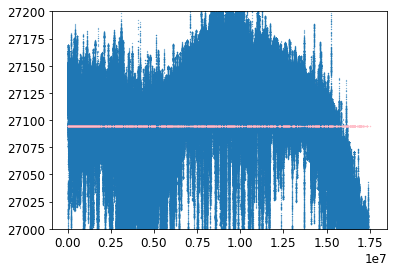

In [13]:
### Plot mean
plt.scatter(df.index, df['X'], s=.05)
plt.scatter(df.index[df['flag']==True], df['filled_mean'][df['flag']==True], color='pink', s=.025)
plt.xlim()
plt.ylim(27000, 27200)
plt.show()

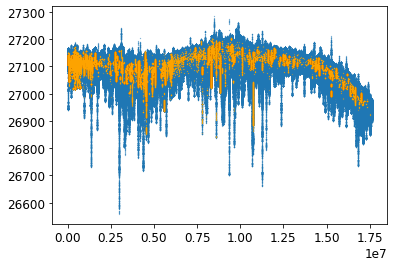

In [14]:
### Plot linear

plt.scatter(df.index, df['filled_linear'], s=.05)
plt.scatter(df.index[df['flag']==True], df['filled_linear'][df['flag']==True], color='orange', s=.025)
plt.xlim()
plt.ylim()
plt.show()


(27000.0, 27200.0)

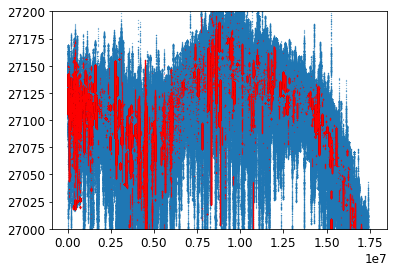

In [15]:
## plot cubic

plt.scatter(df.index, df['X'], s=.05)
plt.scatter(df.index[df['flag']==True], df['filled_cubic'][df['flag']==True], color='red', s=.025)
plt.xlim()
plt.ylim(27000, 27200)

In [16]:
new_set = df.fillna(method='ffill')

(27000.0, 27200.0)

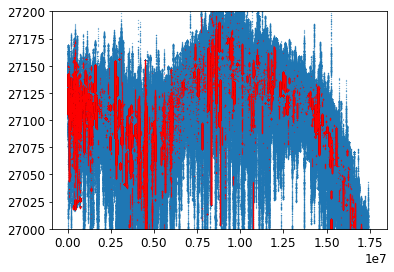

In [17]:

plt.scatter(new_set.index, new_set['X'], s=.05)
plt.scatter(new_set.index[new_set['flag']==True], new_set['filled_cubic'][new_set['flag']==True], color='red', s=.025)
plt.xlim()
plt.ylim(27000, 27200)

In [18]:
new_set

,Time,X,Y,Z,flag,filled_mean,filled_linear,filled_cubic
0,1983-07-01 00:00:00,27153.872522,5457.099713,22246.4,0,27153.872522,27153.872522,27153.872522
1,1983-07-01 00:01:00,27153.480363,5457.020901,22246.2,0,27153.480363,27153.480363,27153.480363
2,1983-07-01 00:02:00,27153.284284,5456.981495,22246.5,0,27153.284284,27153.284284,27153.284284
3,1983-07-01 00:03:00,27153.223574,5457.791055,22246.6,0,27153.223574,27153.223574,27153.223574
4,1983-07-01 00:04:00,27153.125535,5457.771349,22246.8,0,27153.125535,27153.125535,27153.125535
...,...,...,...,...,...,...,...,...
17622715,2016-12-31 23:55:00,26954.900000,4629.800000,21199.2,0,26954.900000,26954.900000,26954.900000
17622716,2016-12-31 23:56:00,26955.100000,4630.100000,21199.5,0,26955.100000,26955.100000,26955.100000
17622717,2016-12-31 23:57:00,26955.000000,4630.400000,21199.6,0,26955.000000,26955.000000,26955.000000
17622718,2016-12-31 23:58:00,26954.900000,4630.500000,21199.7,0,26954.900000,26954.900000,26954.900000
